In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\mu_sigma\Problem statement 2 dataset\ticdata2000.txt',sep='\t', header=None) 

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display_all(data)

In [36]:
def collect_data(keyword, first_item_number, from_nth_field):
    filename_of_dict = r"C:\Users\HP\Desktop\mu_sigma\Problem statement 2 dataset\dictionary.txt" 
    item_list = []
    
    section_found = False
    item_found = False
    end_of_info = False
    with open (filename_of_dict, 'rt', encoding="ISO-8859-1") as myfile:
        for a_line in myfile:
            if (not end_of_info):
                if (not section_found) and (a_line[:len(keyword)] == keyword):
                    section_found = True
                elif section_found and (a_line[0]== str(first_item_number) or item_found):
                    if a_line == '\n':
                        end_of_info = True
                    else:
                        item_name = ''
                        field_list = a_line.split()

                        for idx in range(from_nth_field - 1, len(field_list)):
                            item_name = item_name + ' ' + field_list[idx]

                        item_list.append(item_name[1:len(item_name)])
                        item_found = True
            else:
                return item_list
    return item_list

In [37]:
def fetch_list_item(nd_array, keyword, from_nth_index = 0):
    for index, item in enumerate(nd_array):
        if index >= from_nth_index:
            if item[-len(keyword):] == keyword:
                return index, item
    return None

In [38]:
def remove_duplicate(df_series, dictionary, offset):
    
    # Create a ndarray from a DataFrame column
    nd_array_data = df_series.to_numpy()
    
    duplicate_items = []
    
    for index, item in enumerate(dictionary):
        if dictionary.count(item) > 1:
            res =  fetch_list_item(dictionary, item, index+1)
            if res is not None:
                duplicate_num, _ = res

                duplicate_items.append([index, duplicate_num])
                # Finally take out the duplicates        
    for dup in duplicate_items:
        dictionary.pop(dup[0]) 
        
        # The subsequent items of the found duplicate must be pushed forward by subtracting 1, to have it aligned with dictionary.txt
        nd_array_data = np.where(nd_array_data>dup[0], nd_array_data - 1, nd_array_data)
        
        # Now replace the duplicate index with the OTHER index of its identical entry
        nd_array_data[np.where(nd_array_data==dup[0])] = dup[1]
     # Adjust raw data numbers where its corresponding column/field in the dectionary list has 1-based order
    nd_array_data = nd_array_data - offset
    
    return dictionary, nd_array_data


In [44]:
def change_column_type_from_int64_to_category():
    dictionary_label_prefix = 'L'
    
    data_tables = [[0, 1, 2], 
                     [1, 1, 2], 
                     [2, 1, 2], 
                     [3, 0, 2], 
                     [4, 0, 2]]  

    def remove_duplicate_and_assign_new_values(df, item):
        label_list, new_values = remove_duplicate(df[item], 
                                                collect_data(dictionary_label_prefix + str(i[0]), i[1], i[2]),
                                                i[1])
            
        df[item] = new_values
    
    for i in data_tables:
        res = fetch_list_item(list_of_column_names,
                              dictionary_label_prefix + str(i[0]),
                              0)
        if res is not None:
            index, item = res
            
            remove_duplicate_and_assign_new_values(df, item)
            remove_duplicate_and_assign_new_values(x_test, item)

In [45]:
column_names = [["DATA DICTIONARY", 1, 3]]
list_of_column_names = collect_data(str(column_names[0][0]), column_names[0][1], column_names[0][2])

df.columns = list_of_column_names

feature_labels = list_of_column_names[:-1]
x_test = pd.read_csv(r'C:\Users\HP\Desktop\mu_sigma\Problem statement 2 dataset\ticeval2000.txt', sep='\t', header=None, low_memory=False) 
x_test.columns = feature_labels

In [46]:
df.head()

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [47]:
change_column_type_from_int64_to_category()

In [48]:
df.head()

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,31,1,3,1,7,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,35,1,2,1,7,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,35,1,2,1,7,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,7,1,3,2,2,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,38,1,4,1,9,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [54]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [56]:
df.to_feather('formatted_raw_data')

In [57]:
df_raw = pd.read_feather('formatted_raw_data')

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [61]:
col_idx = df_raw.shape[1]-1

df_target = df_raw.iloc[:, col_idx]
df_features = df_raw.drop(df_raw.columns[col_idx], axis='columns')

x_train, x_valid, y_train, y_valid = train_test_split(df_features, df_target, train_size=0.8, random_state=42)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, x_test.shape

((4657, 85), (1165, 85), (4657,), (1165,), (4000, 85))

In [62]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
# Take Python 3.7 default value n_estimators = 100

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9931286235774104

In [63]:
clf.predict_proba(x_valid)

array([[0.986     , 0.014     ],
       [0.99      , 0.01      ],
       [1.        , 0.        ],
       ...,
       [0.94      , 0.06      ],
       [0.96333333, 0.03666667],
       [1.        , 0.        ]])

In [64]:
# Build a confusion matrix: correctly predicted ones are diagonally displayed
def build_confusion_matrix(clf, data_features, data_target):
    df = pd.crosstab(data_target, clf.predict(data_features), rownames=['Actual Classes'], colnames=['Predicted Classes'])
    print (df)
    count_correct_incorrect_total(df)

In [65]:
def count_correct_incorrect_total(df):
    correct_sum = 0
    total_sum = 0
    
    num_classes = len(df.index)    
    
    for i in range(num_classes):
        for j in range(num_classes):
            total_sum += df.loc[i, j]
            if i == j:
                correct_sum += df.loc[i, j]

    print ("\nCorrect: {0:,}, Incorrect: {1:,}, Total: {2:,} => Accuracy: {3:.4f}%".format(correct_sum, 
                                                                                   total_sum - correct_sum, 
                                                                                   total_sum,
                                                                                   correct_sum / total_sum * 100))

In [66]:
from sklearn.metrics import confusion_matrix
build_confusion_matrix(clf, x_valid, y_valid)

Predicted Classes     0   1
Actual Classes             
0                  1064  20
1                    78   3

Correct: 1,067, Incorrect: 98, Total: 1,165 => Accuracy: 91.5880%


In [68]:
y_test = pd.read_csv(r"C:\Users\HP\Desktop\mu_sigma\Problem statement 2 dataset\tictgts2000.txt", sep='\t', header=None)

y_test = y_test.iloc[:, 0]

clf.predict_proba(x_test)

array([[0.98 , 0.02 ],
       [0.67 , 0.33 ],
       [0.955, 0.045],
       ...,
       [0.93 , 0.07 ],
       [0.96 , 0.04 ],
       [0.915, 0.085]])

In [69]:
build_confusion_matrix(clf, x_test, y_test)

Predicted Classes     0   1
Actual Classes             
0                  3723  39
1                   221  17

Correct: 3,740, Incorrect: 260, Total: 4,000 => Accuracy: 93.5000%


In [70]:
def get_features_by_importance(classifier, return_col_names = True):
    importances = classifier.feature_importances_
    col_nums_by_importance = np.argsort(importances)[::-1]
    
    if return_col_names:
        dict_col_names = dict(enumerate(feature_labels))
        col_names = []
        for i in range(len(col_nums_by_importance)):
            col_names.append(dict_col_names.get(col_nums_by_importance[i], ""))

    return col_names if return_col_names else col_nums_by_importance, importances[col_nums_by_importance]   
    
def show_feature_importance_stats(df, col_names_sorted, col_feature_scores, show_all_features = True):
    
    feature_ranking_num = df.shape[1] if type(show_all_features) is bool else show_all_features
    
    print("Top Predictive Features:")

    col_labels = []
    col_importance = []
    
    for f in range(feature_ranking_num):
        #print("{0}. {1} ({2})".format(f + 1, new_labels[f], importances[indices[f]]))
        col_labels.append(col_names_sorted[f])
        col_importance.append(col_feature_scores[f])
        #col_importance.append(importances[indices[f]])
    
    df_ranking = pd.DataFrame({"Feature": col_labels, "Importance": col_importance})
    df_ranking.style.set_properties(**{'text-align': 'left'})
    dfStyler = df.style.set_properties(**{'text-align': 'left'})
    dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
    print(df_ranking.to_string(index=False))

    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(feature_ranking_num), col_feature_scores[:feature_ranking_num], color="y")
    #plt.set_yticklabels(new_labels[:feature_num])
    plt.yticks(range(feature_ranking_num), col_names_sorted[:feature_ranking_num])
    plt.ylim([-1, feature_ranking_num])
    plt.show()

Top Predictive Features:
                                          Feature  Importance
                       Contribution fire policies    0.050932
                           Number of car policies    0.041281
                        Contribution car policies    0.037966
                          Customer Subtype see L0    0.037735
Contribution private third party insurance see L4    0.026755
                           Purchasing power class    0.025864
                          Number of fire policies    0.022790
                        Customer main type see L2    0.021931
                                Middle management    0.020292
                           Medium level education    0.020248
                          Household with children    0.020140
   Number of private third party insurance 1 - 12    0.020034
                                   Protestant ...    0.019820
                                 Income 30-45.000    0.019577
                                      No reli

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


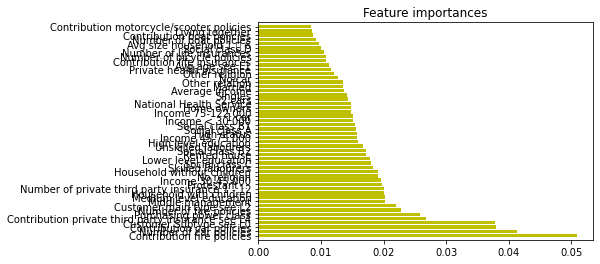

In [71]:
plt.show()
col_names_sorted, col_feature_scores = get_features_by_importance(clf, True)
show_feature_importance_stats(x_train, col_names_sorted, col_feature_scores, 50)

In [72]:
def get_df_by_importance(classifer, df, show_all_features = True):

    feature_ranking_num = df.shape[1] if type(show_all_features) is bool else show_all_features
    
    col_names, _ =  get_features_by_importance(classifer, True)
    return df[col_names[:feature_ranking_num]]    

def show_correlation_among_features(classifier, df, show_all_features = True):
    corr = get_df_by_importance(classifier, df, show_all_features).corr()
    return corr.style.background_gradient(cmap='coolwarm')

In [73]:
show_correlation_among_features(clf, x_train, 15)

,Contribution fire policies,Number of car policies,Contribution car policies,Customer Subtype see L0,Contribution private third party insurance see L4,Purchasing power class,Number of fire policies,Customer main type see L2,Middle management,Medium level education,Household with children,Number of private third party insurance 1 - 12,Protestant ...,Income 30-45.000,No religion
Contribution fire policies,1.000000,0.108403,0.099442,-0.021949,0.480052,0.100955,0.862355,-0.011458,-0.007888,-0.002113,0.032491,0.482431,0.081060,-0.004770,-0.071861
Number of car policies,0.108403,1.000000,0.915113,-0.019505,0.158626,0.040910,0.031002,-0.016407,0.020029,0.006691,0.029720,0.147227,0.025496,0.022480,-0.017268
Contribution car policies,0.099442,0.915113,1.000000,-0.016514,0.168681,0.031408,0.023711,-0.016152,0.016405,0.003668,0.036515,0.157769,0.021960,0.033540,-0.016796
Customer Subtype see L0,-0.021949,-0.019505,-0.016514,1.000000,-0.047411,-0.572380,-0.023657,0.948039,-0.213948,-0.273145,-0.003109,-0.040417,0.071641,0.144552,-0.005152
Contribution private third party insurance see L4,0.480052,0.158626,0.168681,-0.047411,1.000000,0.013213,0.509897,-0.053357,0.016619,0.015276,-0.035928,0.981406,-0.002301,-0.013590,-0.019243
Purchasing power class,0.100955,0.040910,0.031408,-0.572380,0.013213,1.000000,0.027932,-0.537730,0.136889,0.233601,0.259571,0.004546,0.037614,-0.124822,-0.079053
Number of fire policies,0.862355,0.031002,0.023711,-0.023657,0.509897,0.027932,1.000000,-0.022518,-0.001691,-0.005614,-0.014354,0.518138,0.055041,0.001922,-0.052868
Customer main type see L2,-0.011458,-0.016407,-0.016152,0.948039,-0.053357,-0.537730,-0.022518,1.000000,-0.222455,-0.274875,0.059755,-0.044896,0.083676,0.160354,0.001474
Middle management,-0.007888,0.020029,0.016405,-0.213948,0.016619,0.136889,-0.001691,-0.222455,1.000000,0.395485,-0.029874,0.014679,-0.025266,0.138308,-0.030022
Medium level education,-0.002113,0.006691,0.003668,-0.273145,0.015276,0.233601,-0.005614,-0.274875,0.395485,1.000000,-0.040467,0.007673,-0.018466,-0.000324,-0.040213


In [74]:
clf2 = RandomForestClassifier(random_state = 42)
print ("default Parameters in use:\n")
clf2.get_params()

default Parameters in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 20)]

max_features = ['auto', 'sqrt']

bootstrap = [True, False]

# Create the grid
grid = {'n_estimators': n_estimators, 'max_features': max_features,'bootstrap': bootstrap}

print(grid)

{'n_estimators': [10, 17, 24, 32, 39, 46, 54, 61, 68, 76, 83, 91, 98, 105, 113, 120, 127, 135, 142, 150], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [77]:
clf2 = RandomForestClassifier()

clf_grid = GridSearchCV(estimator = clf2, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)
clf_grid.fit(df_features, df_target)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 17, 24, 32, 39, 46, 54, 61, 68,
                                          76, 83, 91, 98, 105, 113, 120, 127,
                                          135, 142, 150]},
             verbose=2)

In [78]:
clf_grid.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 142}

In [83]:
clf_final = RandomForestClassifier(n_estimators = 24, max_features = 'sqrt', random_state = 42)
clf_final.fit(df_features, df_target) 
build_confusion_matrix(clf_final, x_test, y_test)

Predicted Classes     0   1
Actual Classes             
0                  3714  48
1                   222  16

Correct: 3,730, Incorrect: 270, Total: 4,000 => Accuracy: 93.2500%


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(df_features, df_target) 
build_confusion_matrix(clf_gb, x_test, y_test)

Predicted Classes     0  1
Actual Classes            
0                  3755  7
1                   231  7

Correct: 3,762, Incorrect: 238, Total: 4,000 => Accuracy: 94.0500%
